# Project: Predicting Heart Disease with Classification Machine Learning Algorithms

## Table of Contents

    1. Introduction:
        Scenario
        Goal
        Features & Predictor
 
    2. Data Wrangling
    
    3. Exploratory Data Analysis:
        Representation of target variable in percentage
        Correlations
        Violin & Box Plots
        Filtering data by positive & negative Heart Disease patient
        
    4. Machine Learning + Predictive Analytics:
        Prepare Data for Modeling
        Modeling/Training
        Making the Confusion Matrix
        Feature Importance
        Predictions
        
    5. Conclusions

## Introduction

You have just been hired at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardioligist measures vitals & hands you this data to peform Data Analysis and predict whether certain patients have Heart Disease

## Goal

-To predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome. 

 * Positive (+) = 1, patient diagnosed with Heart Disease  
 * Negative (-) = 0, patient not diagnosed with Heart Disease 

-To experiment with various Classification Models & see which yields  greatest accuracy. 
- Examine trends & correlations within our data
- determine which features are important in determing Positive/Negative Heart Disease

## Features and Predictor

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic (
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholestoral in mg/dl  (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiographic results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no) 
10. (oldpeak) = ST depression induced by exercise relative to rest (#) 
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping )
12. (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy 
13. (thal) maximum heart rate achieved - (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversable defect

## Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('heart-disease.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Printing the Number of Rows and Columns in the Dataset

In [8]:
print("(Rows, columns): " + str(df.shape))
df.columns 

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Number Of Unique values

In [10]:
df.nunique(axis=0) # returns the number of  Unique values

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Checking Null Values

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Luckily, we have no missing data**

### Summarizes the count, mean, standard deviation, min, and max for numeric variables.

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see if theirs a good proportion between our positive and negative results. It appears we have a good balance between the two.

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Exploratory Data Analysis

### Representation of the target variable in Percentage

In [16]:
CountNoDisease =len(df[df.target==0])
CountHaveDisease = len(df[df.target==1])
print("Percentage of Patients havent Disease : {:.2f}%".format((CountNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Disease : {:.2f}%".format((CountHaveDisease/ (len(df.target))*100)))


Percentage of Patients havent Disease : 45.54%
Percentage of Patients Have Disease : 54.46%


### Understanding the balancing of data

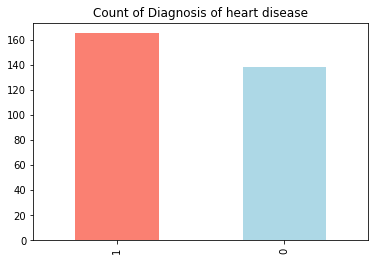

In [17]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of heart disease");


##### Interpretation: The above plot shows the count of population having disease and not having disease with respect to sex and the count of having disease is greater

### Heart Disease Frequency vs Sex

In [18]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

### Compare Target column i.e. Target with Sex Column

In [19]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


### Create a plot for crosstab

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

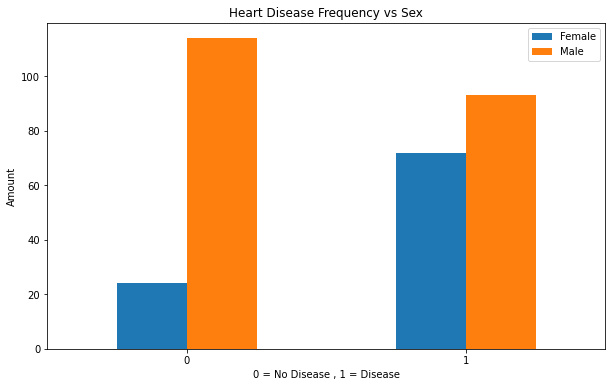

In [22]:
pd.crosstab(df['target'],df['sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

#### Interpretation: The above plot shows the ratio of population having disease and not having disease with respect to sex

### Maximum heart rate vs chest pain wrt Sex

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and chest pain types with respect to gender')

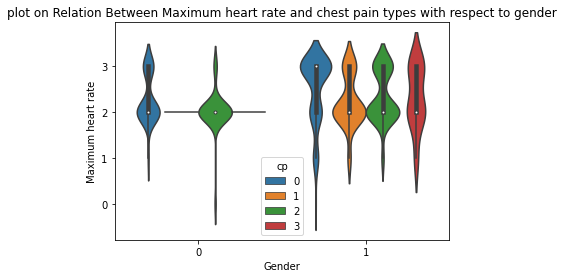

In [25]:
#Plot on Relation Between Maximum heart rate and chest pain types with respect to gender
sns.violinplot(x="sex", y="thal",hue="cp", data=df,
               cmap =["BuPy"]);
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")

**Interpretation**<br>
**The Violen plots of the gender male have higher median and quatile region compared to females and the chest pain type 1 which is atypical angina is higher with respect to the maximum heart rate in both the gender**

### Age vs. Max. Heart Rate for Heart Disease

<AxesSubplot:ylabel='Frequency'>

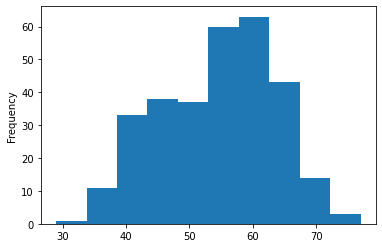

In [26]:
df['age'].plot(kind='hist')

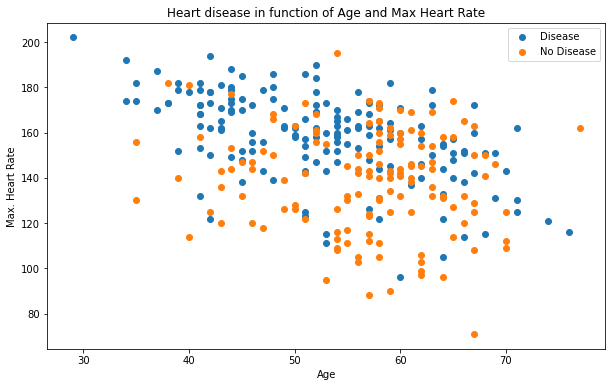

In [27]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['target']==1]['age'], y = df.thalach[df.target==1])

#Target is equal to 0
plt.scatter(x = df[df['target']==0]['age'], y = df.thalach[df.target==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

### Resting Blood Pressure

<AxesSubplot:ylabel='Density'>

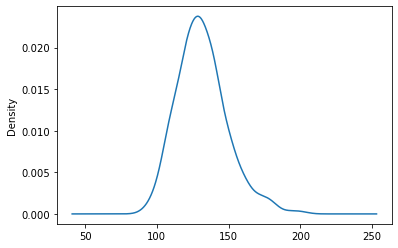

In [30]:
df['trestbps'].plot(kind='kde')

**Interpretation:<br>
The above plot shows the density of Resting blood pressure and the maximum density is around 120-140**

### Chest Pain vs Resting blood pressure wrt sex

C:\Users\Fazil\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relation Between resting chest pain types and Blood Pressure Rate with respect to gender')

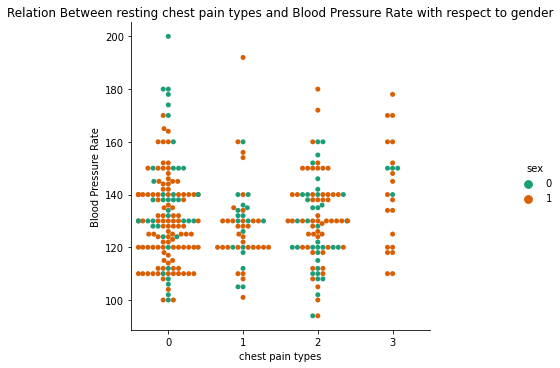

In [33]:
#Plot on Relation Between resting chest pain types and Blood Pressure Rate with respect to gender
sns.catplot(x="cp", y="trestbps",hue="sex",kind ="swarm" ,data=df,palette="Dark2")
plt.xlabel('chest pain types')
plt.ylabel('Blood Pressure Rate')
plt.title(label="Relation Between resting chest pain types and Blood Pressure Rate with respect to gender",loc ='center')

**Interpretation<br>
Acoording to the above catplot it is infered that males are more prone to heart attacks with comparitively higher level of blood pressure than females.**



### Heart_disease vs Fasting Blood Sugar

In [34]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [35]:
#compare target column with Heart_disease and fasting_sugar
pd.crosstab(df['target'],df['fbs'])

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

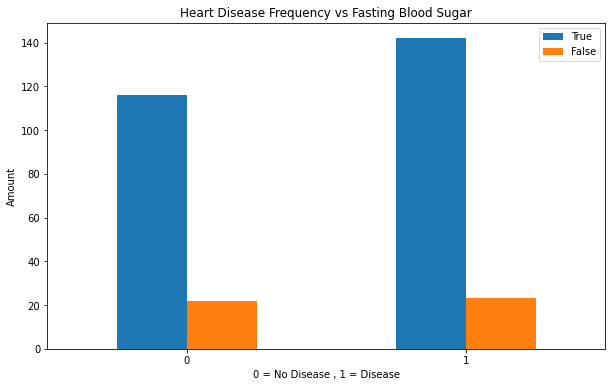

In [36]:
#Create a plot for crosstab

pd.crosstab(df['target'],df['fbs']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

**Interpretation:<br> 
The above plot shows that the sugar level does not contribute to having or not having the heart disease**

### Slope Rate vs cholestral wrt sex


Text(0.5, 1.0, 'Relation Between heart rate slope and cholestrol level with respect to gender')

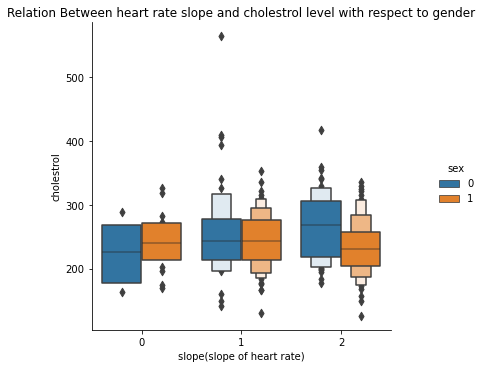

In [38]:
#Plot on Relation Between heart rate slope and cholestrol level with respect to gender
sns.catplot(x="slope", y="chol",hue="sex",kind="boxen", data=df)
plt.xlabel('slope(slope of heart rate)')
plt.ylabel('cholestrol')
plt.title(label="Relation Between heart rate slope and cholestrol level with respect to gender",loc ='center')

**Interpretation<br>
Acoording to the above catplot the higher the cholestrol levels , the lower the heart rate slope ,primarily in men.**

### Chest Pain type with respect to age and sex

Text(0.5, 1.0, 'Chest Pain type with respect to age and sex')

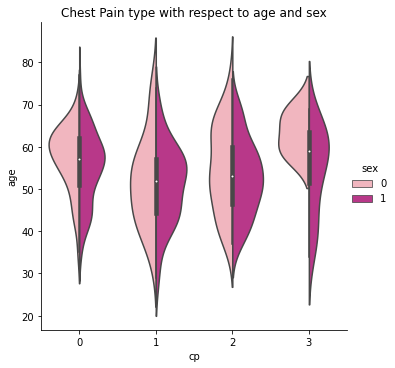

In [40]:
sns.catplot(data=df, kind="violin", x="cp", y="age",hue="sex", split=True,palette="RdPu")
plt.title("Chest Pain type with respect to age and sex")

**Interpretation:<br>
The above plot shows the chest pain type with respect to age and sex and chest pain type 3 is greater for men which shows that they are more prone to heart disease**

## Individual Feature Analysis

### Age(age) Anaysis

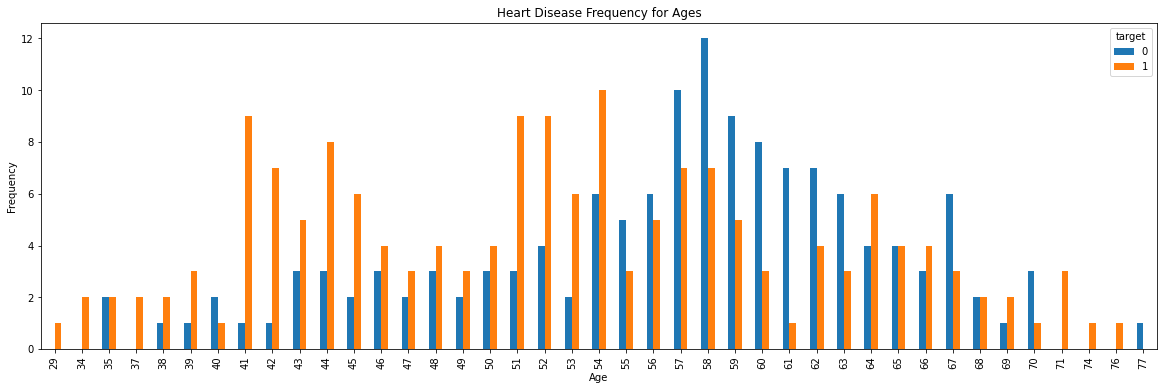

In [41]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### # Let's check 10 ages and their count

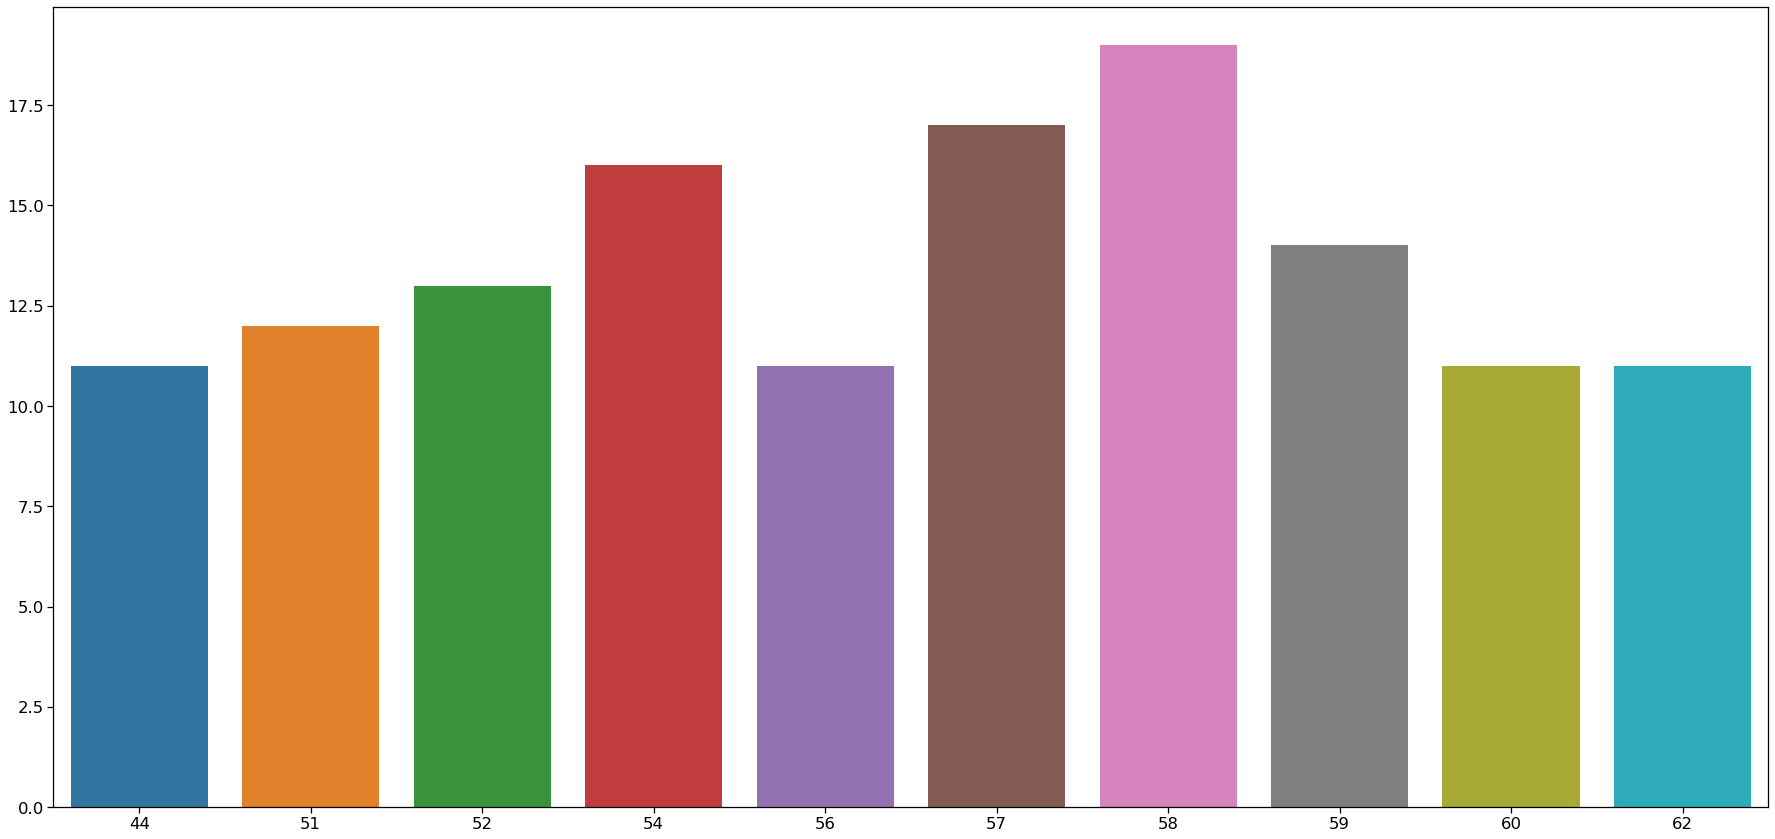

In [43]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

**Let's check the range of age in the dataset.**

In [47]:
minAge=min(df.age)
maxAge=max(df.age)
MeanAge=df.age.mean()
print("Min Age : ",minAge)
print("Max Age : ",maxAge)
print("Mean of the Age : ",MeanAge)

Min Age :  29
Max Age :  77
Mean of the Age :  54.366336633663366


**We should divide the Age feature into three parts - "Young", "Middle" and "Elder"**

In [48]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

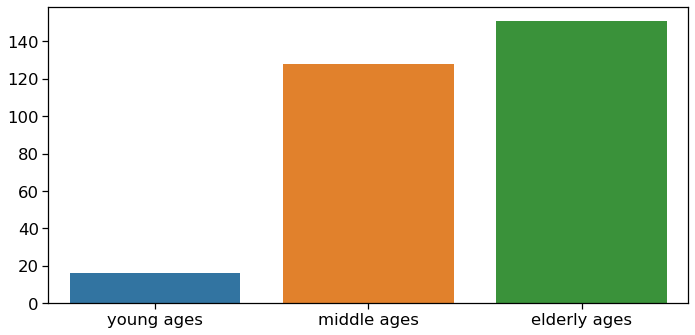

In [52]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**A large proportion of dataset contains Elder people.**

**Elderly people are more likely to suffer from heart disease.**

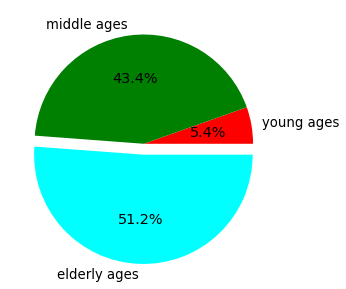

In [51]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=['red','green','cyan'], autopct='%1.1f%%')
plt.tight_layout()

## Chest Pain Type("cp") Analysis

C:\Users\Fazil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


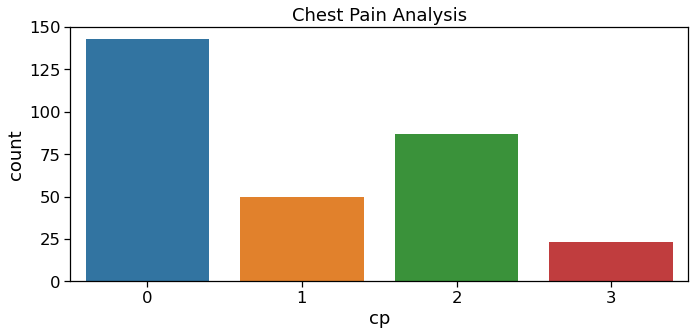

In [54]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(df.cp)
plt.title("Chest Pain Analysis")
plt.tight_layout()

As seen, there are 4 types of chest pain

   * status at least
   * condition slightly distressed
   * condition medium problem
   * condition too bad

### Chest pain wt Sex Analysis

C:\Users\Fazil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


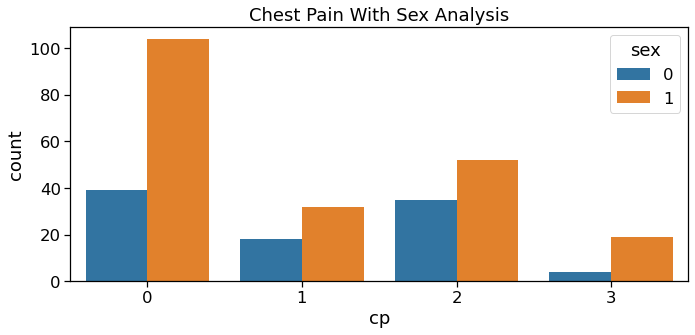

In [56]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'],hue=df["sex"])
plt.title("Chest Pain With Sex Analysis")
plt.tight_layout()

* People having least chest pain are not likely to heart disease.
* People having severe chest pain are  likely to heart disease.

**Elderly people are more likely to have chest pain.**

### Correlations

<AxesSubplot:>

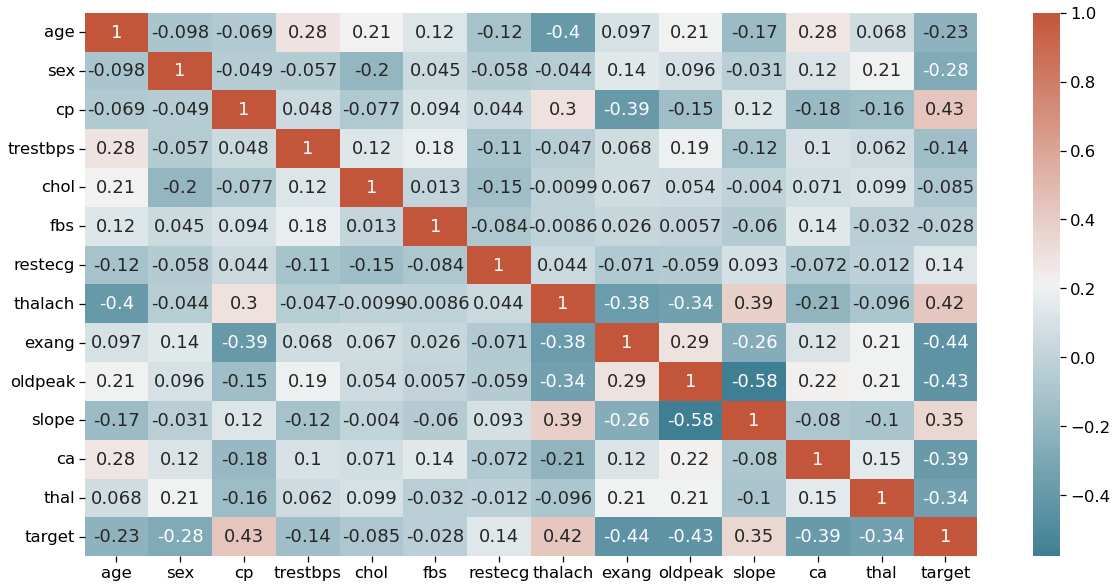

In [66]:
# calculate correlation matrix

corr = df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
#sns.heatmap(corr, xticklabels=corr.columns,
            #yticklabels=corr.columns, 
            #annot=True,
            #cmap=sns.diverging_palette(220, 20, as_cmap=True))

* We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, The greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic. 

* In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow. 



**Pairplots are also a great way to immediatly see the correlations between all variables. But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continous features.**

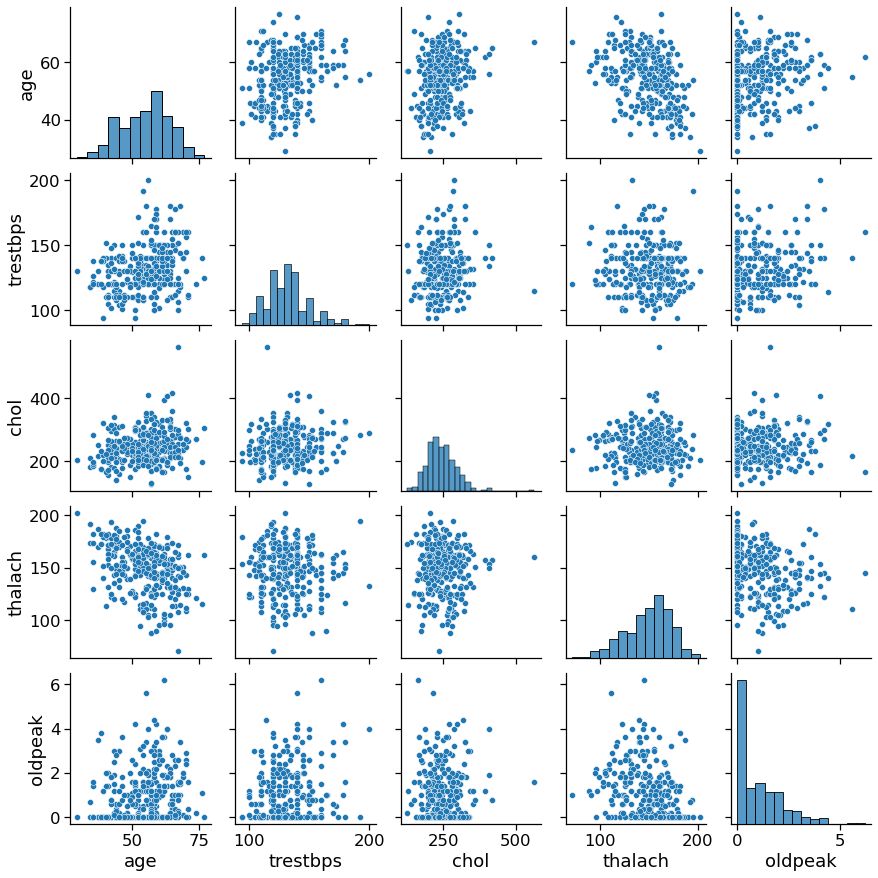

In [68]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Chose to make a smaller pairplot with only the continus variables, to dive deeper into the relationships. Also a great way to see if theirs a positve or negative correlation!

Text(49.369600000000005, 0.5, 'ST depression')

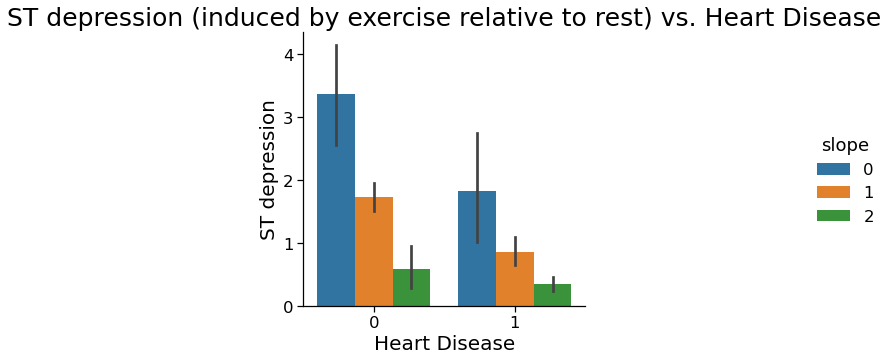

In [70]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The "slope" hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

## Violin & Box Plots

The advantages of showing the Box & Violin plots is that it showsthe basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories. 
It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). In addition it can provide us with outliers in our data.

Text(0, 0.5, 'Thalach Level')

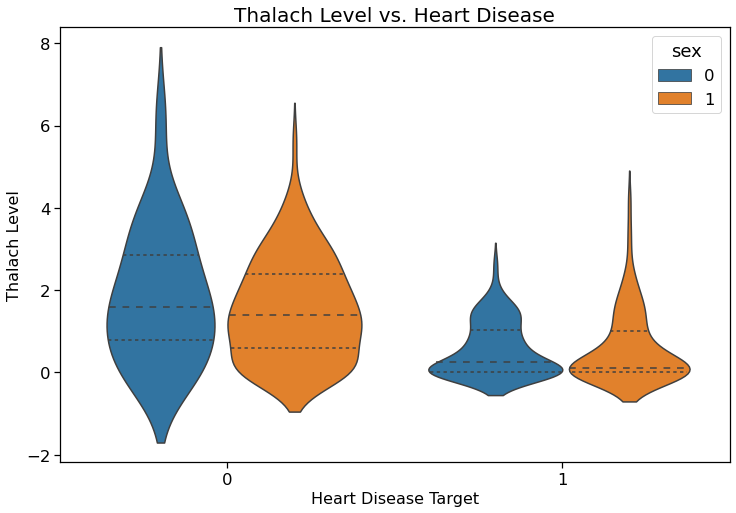

In [72]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.  

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

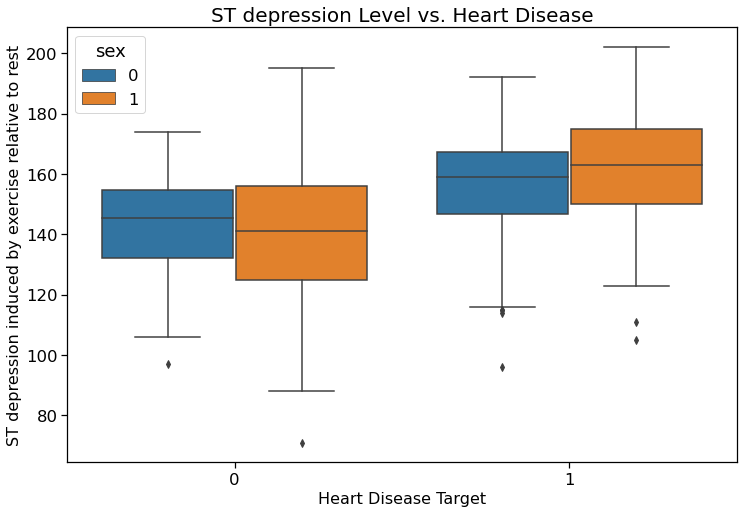

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

**Positive patients exhibit a hightened median for ST depression level, while negative patients have lower levels. In addition, we dont see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression**

# Filtering data by positive & negative Heart Disease patient 

In [77]:
# Filtering data by positive Heart Disease patient 
positive_data = df[df['target']==1]
positive_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [78]:
negative_data=df[df['target']==0]
negative_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [80]:
print("(Positive Patients ST depression): " + str(positive_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(negative_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.5830303030303029
(Negative Patients ST depression): 1.5855072463768118


In [81]:
print("(Positive Patients thalach): " + str(positive_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(negative_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


From comparing positive and negative patients we can see there are vast differenes in means for many of our Features.
From examing the details
 * we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average.
 * In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak)

## 4. Machine Learning + Predictive Analytics

## Prepare For Data Modelling

**Assign the 13 features to X, & the last column to our classification predictor, y**

In [82]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Split: the dataset into the Training set and Test set**

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1) 

**Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.**

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modelling / Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest,XGBoost and Linear Regression
 Note: These are all supervised learning models

**Model 1: Logistic Regression**

In [109]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) #  y predictions
print(classification_report(y_test, y_pred1)) # output accuracy
score_LR=accuracy_score(y_test,y_pred1)
print("Accuracy Score Achieved Using Logistic Regression  is : ",score_LR)

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Accuracy Score Achieved Using Logistic Regression  is :  0.7377049180327869


**Model 2: K-NN (K-Nearest Neighbors)**

In [108]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train) 

y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2)) 
score_KNN=accuracy_score(y_test,y_pred2)
print("Accuracy Score Achieved Using K-Nearest Neighbour is : ",score_KNN)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Accuracy Score Achieved Using K-Nearest Neighbour is :  0.7540983606557377


**Model 3: SVM (Support Vector Machine)**

In [107]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1)
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3)) 
score_SVC=accuracy_score(y_test,y_pred3)
print("Accuracy Score Achieved Using Support Vector Machine is : ",score_SVC)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Accuracy Score Achieved Using Support Vector Machine is :  0.7540983606557377


**Model 4:  Naives Bayes Classifier**

In [106]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() 
model4.fit(x_train, y_train) 

y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))
score_NB=accuracy_score(y_test,y_pred4)
print("Accuracy Score Achieved Using Naive Bayes is : ",score_NB)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Accuracy Score Achieved Using Naive Bayes is :  0.7704918032786885


**Model 5: Decision Trees**

In [105]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) 
model5.fit(x_train, y_train)  

y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5)) 
score_DT=accuracy_score(y_test,y_pred5)
print("Accuracy Score Achieved Using Decision Tree is : ",score_DT)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Accuracy Score Achieved Using Decision Tree is :  0.6885245901639344


**Model 6: Random Forest**

In [104]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)  

y_pred6 = model6.predict(x_test) 
print(classification_report(y_test, y_pred6)) 
score_RF=accuracy_score(y_test,y_pred6)
print("Accuracy Score Achieved Using Random Forest is : ",score_RF)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy Score Achieved Using Random Forest is :  0.8032786885245902


**Model 7:  XGBoost**

In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))
score_XGB=accuracy_score(y_test,y_pred7)
print("Accuracy Score Achieved Using XGB Classifier is : " ,score_XGB)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

Accuracy Score Achieved Using XGB Classifier is :  0.7868852459016393


In [113]:
scores = [score_LR,score_NB,score_SVC,score_KNN,score_DT,score_RF,score_XGB]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(round(scores[i],2))+" %")

The accuracy score achieved using Logistic Regression is: 0.74 %
The accuracy score achieved using Naive Bayes is: 0.77 %
The accuracy score achieved using Support Vector Machine is: 0.75 %
The accuracy score achieved using K-Nearest Neighbors is: 0.75 %
The accuracy score achieved using Decision Tree is: 0.69 %
The accuracy score achieved using Random Forest is: 0.8 %
The accuracy score achieved using XGBoost is: 0.79 %


C:\Users\Fazil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

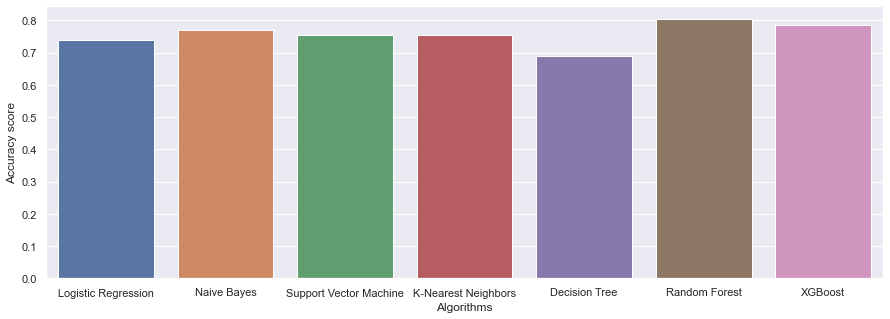

In [117]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

From comparing the 7 models, we can conclude that
    
   **Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%**.


We have precision, recall, f1-score and support:

**Precision**: "how many are correctly classified among that class"

**Recall**   : "how many of this class you find over the whole number of element of this class" 

**F1-score** : harmonic mean of precision and recall values. 
           F1 score reaches its best value at 1 and worst value at 0. 
           F1 Score = 2 x ((precision x recall) / (precision + recall))
 
**Support**  : Samples of the true response that lie in that class.

## Making the Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

* 21 is the amount of True Positives in our data, while 28 is the amount of True Negatives.

* 9 & 3 are the number of errors. 

* There are 9 type 1 error (False Positives)- You predicted positive and it’s false.

* There are 3 type 2 error (False Negatives)- You predicted negative and it’s false.

* Hence if we calculate the accuracy its # Correct Predicted/ # Total.
  In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true   negatives.

* (TP + TN)/(TP + TN + FP + FN).
* (21+28)/(21+28+9+3) = 0.80 = 80% accuracy

**Note**: A good rule of thumb is that any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

## Feature Importance

* Feature Importance provides a score that indicates how helpful each feature was in our model. 

* The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [120]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d , Score: %.5f' % (i,v))

Feature: 0 , Score: 0.07814
Feature: 1 , Score: 0.04206
Feature: 2 , Score: 0.16580
Feature: 3 , Score: 0.07477
Feature: 4 , Score: 0.07587
Feature: 5 , Score: 0.00828
Feature: 6 , Score: 0.02014
Feature: 7 , Score: 0.12772
Feature: 8 , Score: 0.06950
Feature: 9 , Score: 0.09957
Feature: 10 , Score: 0.04677
Feature: 11 , Score: 0.11667
Feature: 12 , Score: 0.07473


<AxesSubplot:>

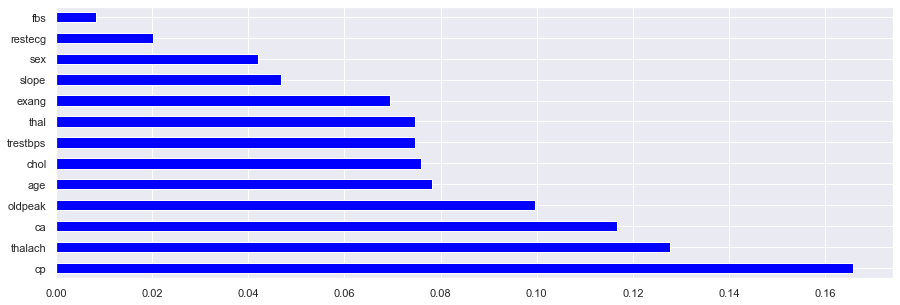

In [122]:
index= df.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

From the Feature Importance graph above, we can conclude that the top 4 significant features were
  * chest pain type (cp)
  * maximum heart rate achieved (thalach) 
  * number of major vessels (ca)
  * ST depression induced by exercise relative to rest (oldpeak).

## Predictions

Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm. 

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110. 

In addition he has a serum cholestoral of 230 mg/dl. 

He is fasting blood sugar > 120 mg/dl. 

He has a resting electrocardiographic result of 1. 

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat. 

He has no major vessels colored by fluoroscopy,
and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Disease?


In [123]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


Yes! Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later.

Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. We can see that our results are very accurate!

In [124]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


## Conclusions

1. Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

2. Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak). 

3. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.